In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 1. Analyse et exploration des données

## 1.1 Objectif : 
- Exploration des données
- Analyser les relations entre les variables
- Réduction de dimention si nécessaire, si possible

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/train.csv')

In [ ]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
print(f'Nous avons {data.shape[0]} lignes et {data.shape[1]} variables')

Nous avons 4250 lignes et 20 variables


In [ ]:
data.dtypes.value_counts()

float64    8
int64      7
object     5
dtype: int64

In [ ]:
print("Le nombre de valeurs manquantes par variables :")
data.isna().sum()

Le nombre de valeurs manquantes par variables :


state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
print('Description des variables qualitatives')
data.describe(include='O')

Description des variables qualitatives


,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [ ]:
print('Description des variables quantitatives')
data.describe()

Description des variables quantitatives


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
print('Répartition de la variable cible :')
data.churn.value_counts(normalize = True)

Répartition de la variable cible :


no     0.859294
yes    0.140706
Name: churn, dtype: float64

In [ ]:
qualitatives_data = pd.DataFrame()
qualitatives_data['churn'] = data.churn
qualitatives_data['state'] = data.state
for col in data.select_dtypes("object"):
    if col != 'state':
        qualitatives_data[col] = data[col]

#### Analyse du profil des churners

#### Variable State

In [ ]:
for state_name in qualitatives_data.state.unique():
  u = qualitatives_data[(qualitatives_data['state'] == state_name)].churn.value_counts(normalize = True).yes
  print(f'Un client de {state_name} a {round(u*100, 0)} % de change de churner')

Un client de OH a 13.0 % de change de churner
Un client de NJ a 27.0 % de change de churner
Un client de OK a 21.0 % de change de churner
Un client de MA a 16.0 % de change de churner
Un client de MO a 12.0 % de change de churner
Un client de LA a 10.0 % de change de churner
Un client de WV a 14.0 % de change de churner
Un client de IN a 16.0 % de change de churner
Un client de RI a 7.0 % de change de churner
Un client de IA a 11.0 % de change de churner
Un client de MT a 21.0 % de change de churner
Un client de NY a 17.0 % de change de churner
Un client de ID a 11.0 % de change de churner
Un client de VA a 5.0 % de change de churner
Un client de TX a 19.0 % de change de churner
Un client de FL a 12.0 % de change de churner
Un client de CO a 11.0 % de change de churner
Un client de AZ a 9.0 % de change de churner
Un client de SC a 19.0 % de change de churner
Un client de WY a 11.0 % de change de churner
Un client de HI a 5.0 % de change de churner
Un client de NH a 13.0 % de change de 

#### Variable area_code_name

In [ ]:
for area_code_name in qualitatives_data.area_code.unique():
  u = qualitatives_data[(qualitatives_data['area_code'] == area_code_name)].churn.value_counts(normalize = True).yes
  print(f'Un client de {area_code_name} a {round(u*100, 0)} % de change de churner')

Un client de area_code_415 a 14.0 % de change de churner
Un client de area_code_408 a 14.0 % de change de churner
Un client de area_code_510 a 15.0 % de change de churner



#### variable international_plan_name

In [ ]:
for international_plan_name in qualitatives_data.international_plan.unique():
  u = qualitatives_data[(qualitatives_data['international_plan'] == international_plan_name)].churn.value_counts(normalize = True).yes
  print(f'Un client {international_plan_name} international a {round(u*100, 0)} % de change de churner')

Un client no international a 11.0 % de change de churner
Un client yes international a 42.0 % de change de churner


#### variable voice_plan_name

In [ ]:
for voice_mail_plan_name in qualitatives_data.voice_mail_plan.unique():
  u = qualitatives_data[(qualitatives_data['voice_mail_plan'] == voice_mail_plan_name)].churn.value_counts(normalize = True).yes
  print(f'Un client {voice_mail_plan_name} international a {round(u*100, 0)} % de change de churner')

Un client yes international a 7.0 % de change de churner
Un client no international a 16.0 % de change de churner


#### Distribution des variables quantitatives selon la variable cible

In [ ]:
data_df1 = data.copy()
for col in data.select_dtypes("int64"):
  data_df1[[col]] = data_df1[[col]].astype('float')

data_churn_yes = data_df1[data_df1.churn == "yes"]
data_churn_no = data_df1[data_df1.churn == "no"]

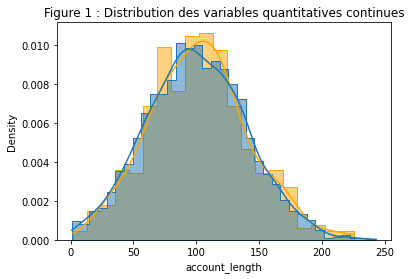

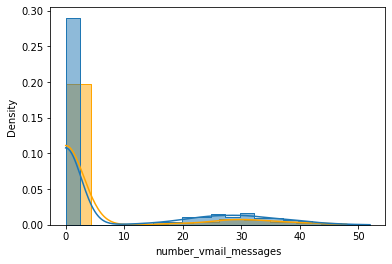

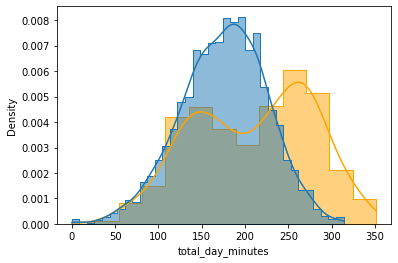

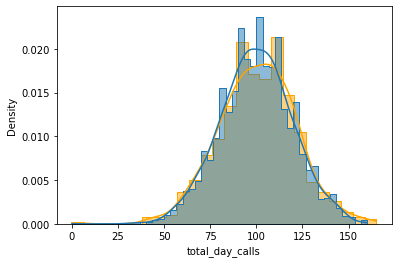

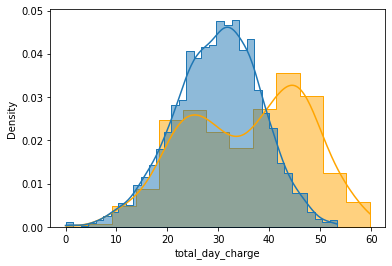

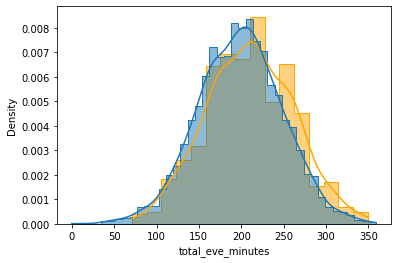

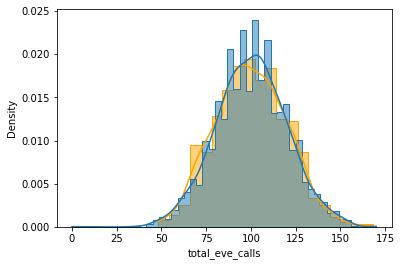

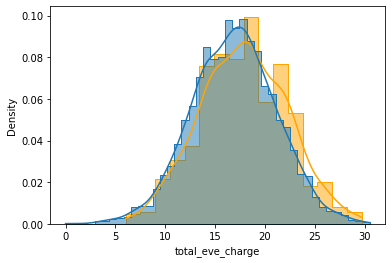

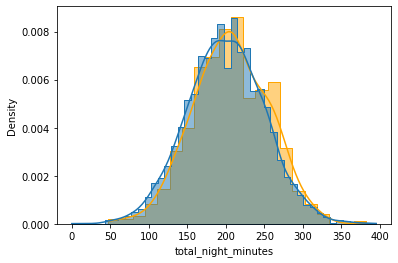

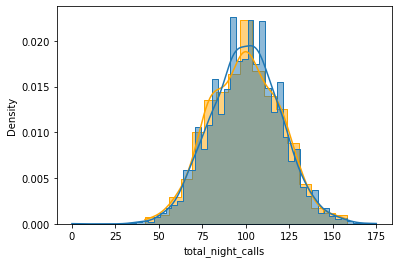

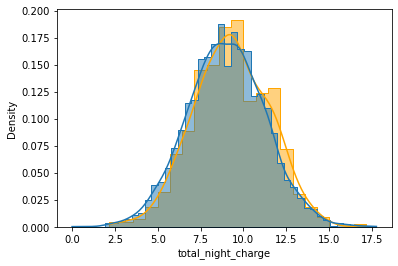

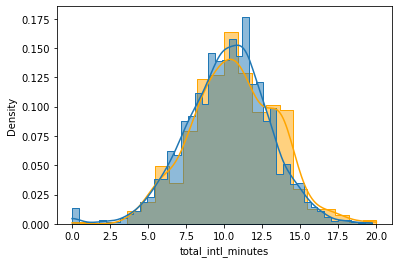

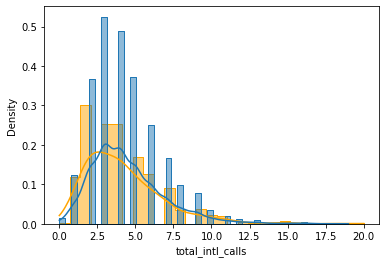

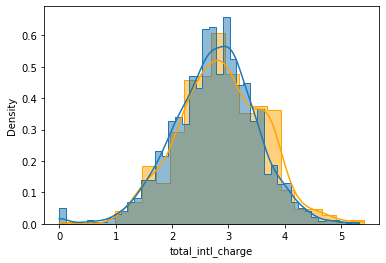

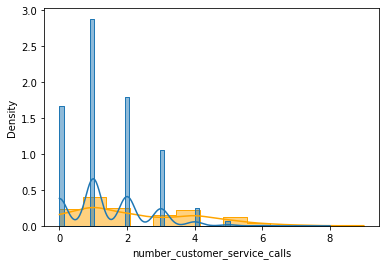

In [ ]:
plt.title("Figure 1 : Distribution des variables quantitatives continues")
for col in data_df1.select_dtypes("float"):
    sns.histplot(data_churn_yes[col], stat = "density", label = "yes", kde = True, color = "orange", element="step")
    sns.histplot(data_churn_no[col], stat = "density", label = "no", kde = True, element="step")
    plt.show()

#### Analyse de corrélation

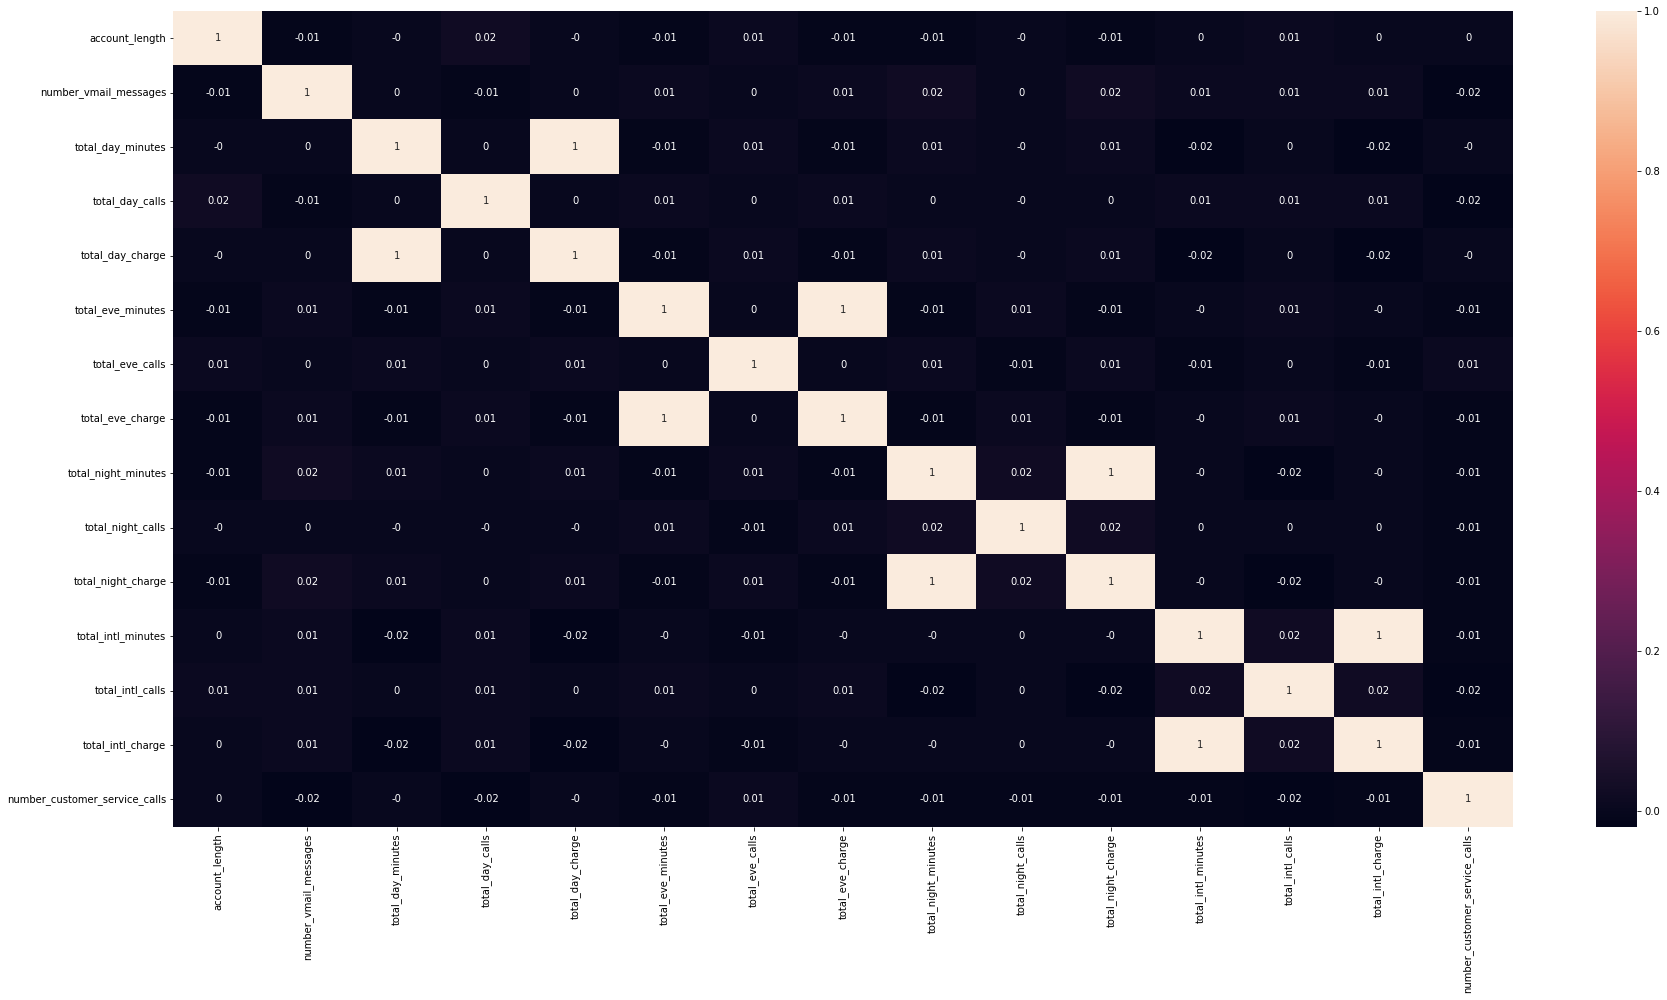

In [ ]:
plt.figure(figsize=(30, 15))
sns.heatmap(round(data_df1.corr(),2), annot=True)
plt.show()

In [ ]:
del data_df1['total_day_charge']
del data_df1['total_eve_charge']
del data_df1['total_night_charge']
del data_df1['total_intl_charge']

#### Visualisation des boxplots

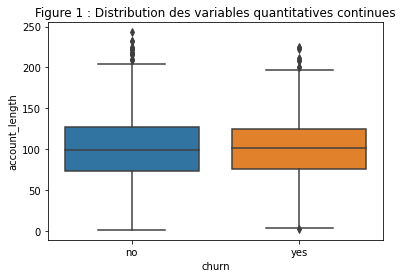

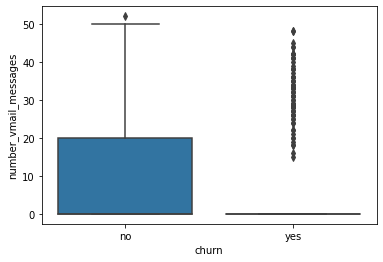

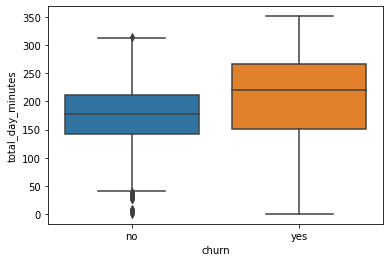

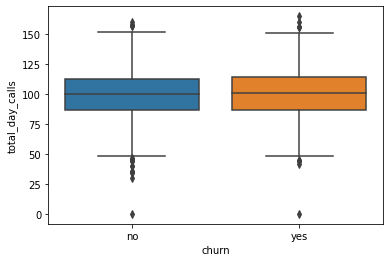

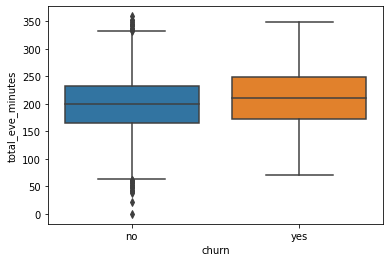

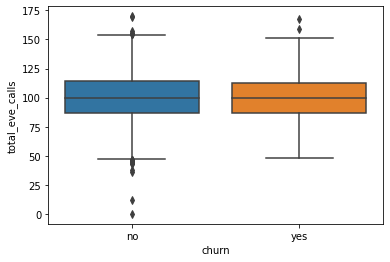

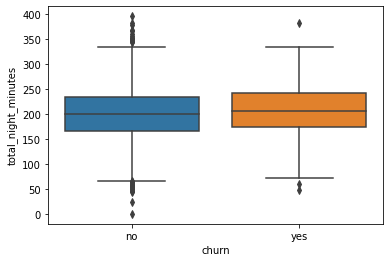

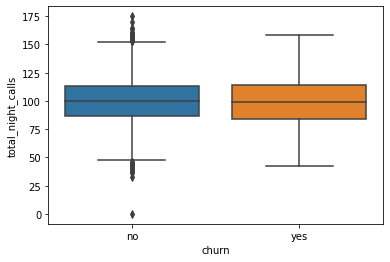

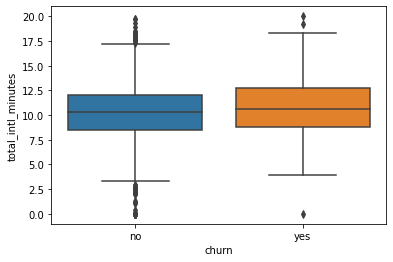

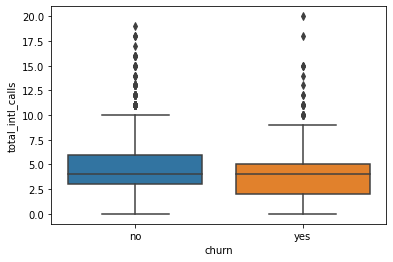

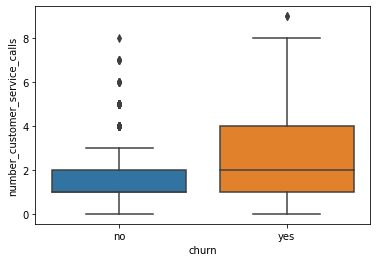

In [ ]:
plt.title("Figure 1 : Distribution des variables quantitatives continues")
for col in data_df1.select_dtypes("float"):
    sns.boxplot(y = col, x = 'churn', data = data_df1)
    plt.show()

## 1.2 Résultats

### Analyse de forme :

- **variable target :** churn
- **lignes, colonnes :** (4250, 20)
- **types de variables :** 8 float64, 7 int64, 5 object
- **variables qualitatives :** Churn, state, area_code, international_plan, voice_mail_plan.
- **analyse des valeurs manquantes :** 0 Na

### Analyse de fond :

- **visualisation de la target :** Nous remarquons que les classes sont déséquilibrées. En effet, le taux de churn est de 15%.

- **visualisation des numerics features / target :**
       - Les variables total_days_minutes et total_days_charge semblent avoir la même distribution. Même constat pour les couples (total_eve_minutes, total_eve_charge), (total_eve_minutes, total_eve_charge) et (total_eve_night, total_eve_night).
       - L'analyse des corrélations indique que les couples cités précédemment sont parfaitement corrélés (i.e coefficient de corrélation = 1).
       - On peut constater également que les churner ont des valeurs élevées de total_days_minutes.
       - L'analyse des boxplots indique que les churners appellent plus fréquement le servive client (number_customer_service_calls). 
       Les variables total_days_minutes et number_customer_service_calls sont des variables discriminantes.

    **N.B:** Existant des variables parfaitement corrélés, une variable de chaque couple devrait être éliminée car n'apportant aucune information supplémentaire.

- **visualisation des object features / target :** 
        - Un client de l'Etat de NJ a 27.0 % de changes de rompre son contrat. Cette probabilité baisse 1/4 lorsqu'il s'agit d'un client de l'Etat de RI.
        - Un client possédant un forfait de messagerie vocale à 2.3 fois plus de probabiltés de rompre son contrat qu'un client qui n'en a pas (respectivement 16% et 7%).
        - Un client possédant un forfait international à 3.8 fois plus de probabiltés de rompre son contrat qu'un client qui n'en a pas (respectivement 42% et 11%).
        - Les probabilités de rupture semblent être similaires quelques soient la région (area_code) du client (environ 15%).



# Preprocessing

# 2. Preprocessing

## 2.1 Objectifs : 
- Préparer les données à la modélisation et diviser les data en trainset et testset.
- Eliminer les variables non significatives
- Standardiser les variables quantitatives
- Encoder les variables catégorielles
- Supprimer la variable area_code de l'analyse.


- **data_train, data_test :** 80%, 20%
- les variables suivantes ont été supprimées : total_day_charge, total_eve_charge, total_night_charge, total_intl_charge, area_code.
- **churn** : no = 0 and yes = 1


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
#from imblearn.pipeline import make_pipeline as mp_smote

In [ ]:
numerical_features = make_column_selector(dtype_include = np.number)
categorial_features = make_column_selector(dtype_include = object)

In [ ]:
features_preprocessing = make_column_transformer((StandardScaler(), numerical_features),
                                                 (OneHotEncoder(), categorial_features))

target_preprocessing = LabelBinarizer()

In [ ]:
def data_preprocessing(dataset):
    
  data_df1 = dataset.copy()
  del data_df1['total_day_charge']
  del data_df1['total_eve_charge']
  del data_df1['total_night_charge']
  del data_df1['total_intl_charge']
  del data_df1['area_code']
  #del data_df1['account_length']

  try:
    del data_df1["churn"]
  except KeyError :
    data_df1["churn"] = 0
    del data_df1["churn"]

  return data_df1

In [ ]:
data_train = data_preprocessing(data)
data_train.shape

(4250, 14)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_train, data.churn, train_size = 0.75, random_state = 2, stratify = data.churn)
y_train = pd.DataFrame(target_preprocessing.fit_transform(np.array(y_train).reshape((y_train.shape[0], 1))))
y_test = pd.DataFrame(target_preprocessing.transform(np.array(y_test).reshape((y_test.shape[0], 1))))

In [ ]:
X_train.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
4161,OH,108,no,yes,30,126.0,124,202.4,84,186.4,99,8.6,1,1
2151,WI,127,no,no,0,218.6,93,149.9,130,204.6,131,9.2,5,2
1031,LA,162,no,yes,33,184.5,139,183.2,78,127.4,106,12.3,6,0
1014,CT,144,yes,yes,35,174.8,127,219.6,93,255.8,90,12.8,3,0
3239,IL,117,no,no,0,228.3,84,152.6,92,309.7,101,3.7,3,3


In [ ]:
X_test.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
2510,WI,103,no,no,0,180.2,134,97.7,85,181.7,134,8.4,3,1
1141,VT,59,no,no,0,151.8,98,209.9,92,266.9,86,11.9,5,1
697,IN,100,no,no,0,216.2,107,215.6,84,138.4,127,10.2,3,0
1840,VA,136,no,yes,35,205.5,86,298.5,119,214.2,104,6.9,4,1
3246,AL,65,no,no,0,144.3,109,331.3,89,155.3,69,11.8,15,3


In [ ]:
y_train.value_counts(normalize = True)

0    0.859429
1    0.140571
dtype: float64

In [ ]:
y_test.value_counts(normalize = True)

0    0.85889
1    0.14111
dtype: float64

# 3. Modélisation

## 3.1 Objectifs :
- **Lutter contre le désiquilibre des données :** 
    En effet nous avons constaté un désiquilibre entre les classes de la vaiable cible 14% taux de churners contre 86% de non churners. Pour atteindre cet objectif, on se fixe comme indicateur le **recall**. L'objectif sera d'obtenir un score > = 0.70.


- **Lutter contre le surapprentissage :** 
    Comme indicateur on choisit l'**accuracy** >= 0.95 par cross validation.


- **Trouver le meilleur modèle** maximisant l'*acuuracy* et pouvant détecter plus de 80% des churners.


#### Importation des packages

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
#from sklearn.tree import DecisionTreeClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest, mutual_info_regression
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold, learning_curve

In [ ]:
cv = StratifiedKFold(4)

In [ ]:
def evaluation(model, name):
    N, train_score, val_score = learning_curve(model, X_train, np.array(y_train).reshape((y_train.shape[0], )), 
                                               cv = cv, scoring = 'accuracy', train_sizes = np.linspace(0.1, 1, 10))
    
    plt.figure(figsize = (12,8))
    plt.plot(N, train_score.mean(axis = 1), label = 'train_score')
    plt.plot(N, val_score.mean(axis = 1), label = 'validation score')
    plt.title(name)
    plt.legend()

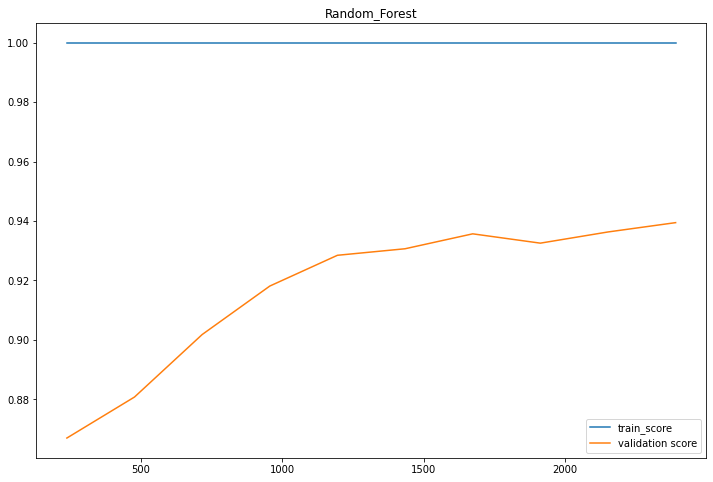

In [ ]:
Random = make_pipeline(features_preprocessing, RandomForestClassifier(random_state = 0))
evaluation(Random, "Random_Forest")

In [ ]:
Bagging = make_pipeline(features_preprocessing, BaggingClassifier(random_state = 0))
GradientBoost = make_pipeline(features_preprocessing, GradientBoostingClassifier(random_state = 0))
XGB = make_pipeline(features_preprocessing, XGBClassifier(random_state = 0))

In [ ]:
list_of_models = {
    "XGBBoost" : XGB,
    "Bagging" : Bagging,
    "GradientBoost" : GradientBoost
}

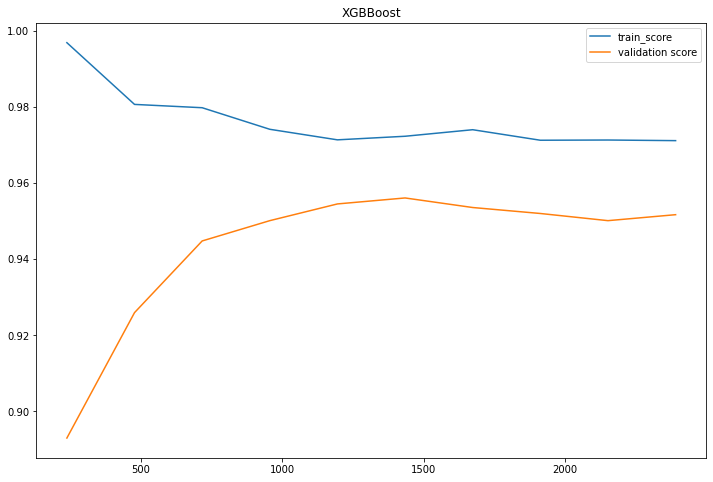

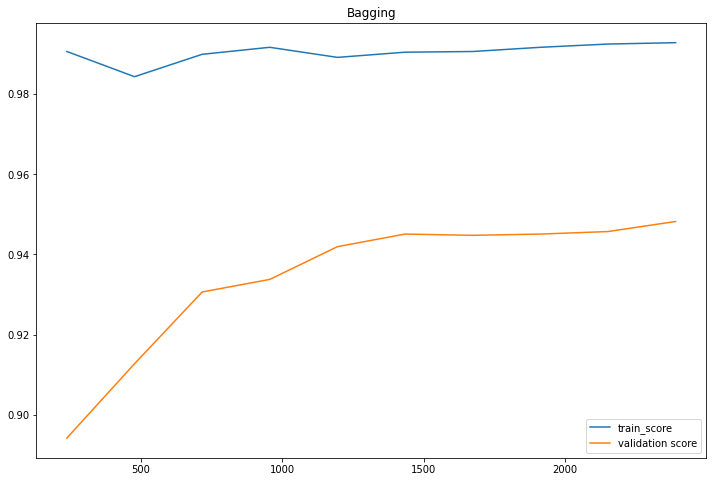

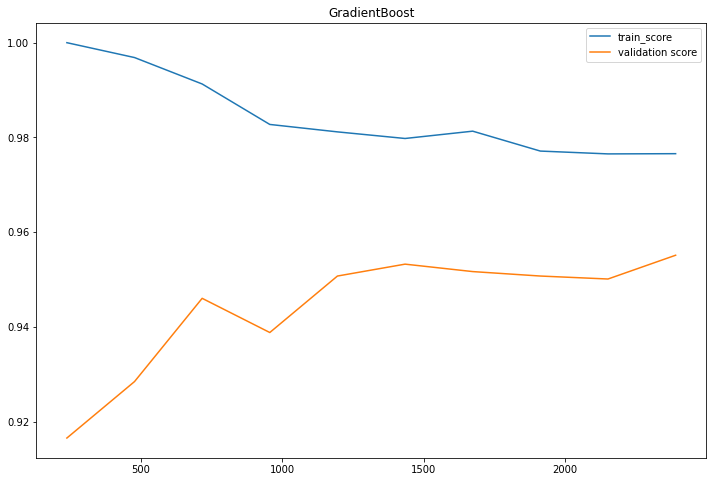

In [ ]:
for name, model in list_of_models.items():
    evaluation(model, name)

#### Modèle GradientBoosting

In [ ]:
GradientBoost = make_pipeline(features_preprocessing, GradientBoostingClassifier(random_state = 25))

In [ ]:
GradientBoost.get_params()

{'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2434bec50>),
                                 ('onehotencoder', OneHotEncoder(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2434be350>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(),
 'columntransformer__onehotencoder__categories': 'auto',
 'columntransformer__onehotencoder__drop': None,
 'columntransformer__onehotencoder__dtype': numpy.float64,
 'columntransformer__onehotencoder__handle_unknown': 'error',
 'columntransformer__onehotencoder__sparse': True,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__standardscaler': StandardScaler(),
 'columntransformer__standardscaler__copy': True,
 'columntransformer__standardscaler__wi

In [ ]:
hyper_params_GradientBoost = {
    'gradientboostingclassifier__max_depth': [3, 5, 7],
    'gradientboostingclassifier__n_estimators': [100, 200],
}

In [ ]:
grid_GradientBoost = GridSearchCV(GradientBoost, hyper_params_GradientBoost, scoring = 'accuracy', cv = cv) 

In [ ]:
grid_GradientBoost.fit(X_train, np.array(y_train).reshape((y_train.shape[0], )))

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2434bec50>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2434be350>)])),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=25))]),
             param_

In [ ]:
print(grid_GradientBoost.best_params_)

{'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__n_estimators': 200}


In [ ]:
y_pred_GradientBoost  = grid_GradientBoost.predict(X_test)
print(confusion_matrix(y_test, y_pred_XGB))
print(classification_report(y_test, y_pred_XGB))

[[901  12]
 [ 43 107]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       913
           1       0.90      0.71      0.80       150

    accuracy                           0.95      1063
   macro avg       0.93      0.85      0.88      1063
weighted avg       0.95      0.95      0.95      1063



#### Modèle XGBoosting

In [ ]:
XGB = make_pipeline(features_preprocessing, XGBClassifier(random_state = 25))

In [ ]:
XGB.get_params()

{'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2434bec50>),
                                 ('onehotencoder', OneHotEncoder(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2434be350>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(),
 'columntransformer__onehotencoder__categories': 'auto',
 'columntransformer__onehotencoder__drop': None,
 'columntransformer__onehotencoder__dtype': numpy.float64,
 'columntransformer__onehotencoder__handle_unknown': 'error',
 'columntransformer__onehotencoder__sparse': True,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__standardscaler': StandardScaler(),
 'columntransformer__standardscaler__copy': True,
 'columntransformer__standardscaler__wi

In [ ]:
hyper_params_XGB = {
    'xgbclassifier__gamma': [0, 0.1, 0.2],
    'xgbclassifier__max_depth': [3, 5],
    'xgbclassifier__n_estimators': [100, 200],
    'xgbclassifier__scale_pos_weight': [1, 1.5, 2]
}

In [ ]:
grid_XGB = GridSearchCV(XGB, hyper_params_XGB, scoring = 'accuracy', cv = cv)

In [ ]:
grid_XGB.fit(X_train, np.array(y_train).reshape((y_train.shape[0], )))

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2434bec50>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2434be350>)])),
                                       ('xgbclassifier',
                                        XGBClassifier(random_state=25))]),
             param_grid={'xgbclassifier__gamm

In [ ]:
print(grid_XGB.best_params_)

{'xgbclassifier__gamma': 0.1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__scale_pos_weight': 1}


In [ ]:
y_pred_XGB  = grid_XGB.predict(X_test)
print(confusion_matrix(y_test, y_pred_XGB))
print(classification_report(y_test, y_pred_XGB))

[[905   8]
 [ 38 112]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       913
           1       0.93      0.75      0.83       150

    accuracy                           0.96      1063
   macro avg       0.95      0.87      0.90      1063
weighted avg       0.96      0.96      0.95      1063



#### Modèle Bagging

In [ ]:
Bagging = make_pipeline(features_preprocessing, BaggingClassifier(random_state = 0))

In [ ]:
Bagging.get_params()

{'baggingclassifier': BaggingClassifier(random_state=0),
 'baggingclassifier__base_estimator': None,
 'baggingclassifier__bootstrap': True,
 'baggingclassifier__bootstrap_features': False,
 'baggingclassifier__max_features': 1.0,
 'baggingclassifier__max_samples': 1.0,
 'baggingclassifier__n_estimators': 10,
 'baggingclassifier__n_jobs': None,
 'baggingclassifier__oob_score': False,
 'baggingclassifier__random_state': 0,
 'baggingclassifier__verbose': 0,
 'baggingclassifier__warm_start': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2434bec50>),
                                 ('onehotencoder', OneHotEncoder(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2434be350>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(),
 'columnt

In [ ]:
hyper_params_Bagging = {
    'baggingclassifier__max_features': [0.90, 1.0, 0.75],
    'baggingclassifier__n_estimators': [10, 100, 200]
}

In [ ]:
grid_Bagging = GridSearchCV(Bagging, hyper_params_Bagging, scoring = 'accuracy', cv = cv) 

In [ ]:
grid_Bagging.fit(X_train, np.array(y_train).reshape((y_train.shape[0], )))

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2434bec50>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2434be350>)])),
                                       ('baggingclassifier',
                                        BaggingClassifier(random_state=0))]),
             param_grid={'baggingclass

In [ ]:
print(grid_Bagging.best_params_)

{'baggingclassifier__max_features': 0.9, 'baggingclassifier__n_estimators': 100}


In [ ]:
y_pred_Bagging = grid_Bagging.predict(X_test)
print(confusion_matrix(y_test, y_pred_Bagging))
print(classification_report(y_test, y_pred_Bagging))

[[901  12]
 [ 49 101]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       913
           1       0.89      0.67      0.77       150

    accuracy                           0.94      1063
   macro avg       0.92      0.83      0.87      1063
weighted avg       0.94      0.94      0.94      1063



## 3.2 Résultats

- **Modèle Random_forest :** Cet modèle semble être en surapprentissage au regard de l'analyse de la courbe d'apprentissage.


- **Modèle XGBoosting :** n'est pas en surenprentissage et donne un score de de 0.95 pour *accuracy* 0.75 pour le *recall*.

- **Modèle GradienBoosting :** n'est pas en surenprentissage et donne un score de de 0.95 pour *accuracy* 0.71 pour le *recall* sur l'échantillon de test. L'analyse de la courbe d'apprentissage montre qu'avec plus de données d'apprentissage l'on pourrait **éventuellement améliorer la précision du modèle.**

- **Modèle GradienBoosting :** n'est pas en surenprentissage et donne un score de de 0.94 pour *accuracy* 0.67 pour le *recall* sur l'échantillon de test. L'analyse de la courbe d'apprentissage montre qu'avec plus de données d'apprentissage l'on pourrait **éventuellement améliorer la précision du modèle.**

**Aucun de ces modèles individuelles** ne permet de d'tteindre l'objectif *3* que nous sommes fixé.

## 4.1 Modélisation ensembliste

### Objectif :
  - Assemblage des modèles individuelles pour former un modèle plus efficace

#### Package StackingClassifier, VotingClassifier

In [ ]:
from sklearn.ensemble import StackingClassifier, VotingClassifier

#### Augmentation des données d'entrainement

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_train, data.churn, train_size = 0.85, random_state = 0, stratify = data.churn)
y_train = pd.DataFrame(target_preprocessing.fit_transform(np.array(y_train).reshape((y_train.shape[0], 1))))
y_test = pd.DataFrame(target_preprocessing.transform(np.array(y_test).reshape((y_test.shape[0], 1))))

#### Voting and Stacking

In [ ]:
Voting = VotingClassifier([
                               ("grid_GradientBoost", grid_GradientBoost),
                               ("gri_XGB", grid_XGB),
                               ("Bagging", grid_Bagging)
                               ],
                              voting = "soft")

In [ ]:
Stacking = StackingClassifier([
                               ("grid_GradientBoost", grid_GradientBoost),
                               ("XGB", grid_XGB),
                               ("Bagging", grid_Bagging)
                               ],
                              final_estimator = XGBClassifier(gamma = 0.1, max_depth = 5))

In [ ]:
Stacking.fit(X_train, np.array(y_train).reshape((y_train.shape[0], )))

StackingClassifier(estimators=[('grid_GradientBoost',
                                GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                                             estimator=Pipeline(steps=[('columntransformer',
                                                                        ColumnTransformer(transformers=[('standardscaler',
                                                                                                         StandardScaler(),
                                                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2434bec50>),
                                                                                                        ('onehotencoder',
                                                                                                         OneHotEn...
                                                                  

Scores du Stacking

In [ ]:
y_pred_Stacking  = Stacking.predict(X_test)
print(confusion_matrix(y_test, y_pred_Stacking))
print(classification_report(y_test, y_pred_Stacking))

[[541   7]
 [ 20  70]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       548
           1       0.91      0.78      0.84        90

    accuracy                           0.96       638
   macro avg       0.94      0.88      0.91       638
weighted avg       0.96      0.96      0.96       638



In [ ]:
Voting.fit(X_train, np.array(y_train).reshape((y_train.shape[0], )))

VotingClassifier(estimators=[('grid_GradientBoost',
                              GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                                           estimator=Pipeline(steps=[('columntransformer',
                                                                      ColumnTransformer(transformers=[('standardscaler',
                                                                                                       StandardScaler(),
                                                                                                       <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2434bec50>),
                                                                                                      ('onehotencoder',
                                                                                                       OneHotEnco...
                                                                                

Scores du Voting

In [ ]:
y_pred_Voting  = Voting.predict(X_test)
print(confusion_matrix(y_test, y_pred_Voting))
print(classification_report(y_test, y_pred_Voting))

[[541   7]
 [ 19  71]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       548
           1       0.91      0.79      0.85        90

    accuracy                           0.96       638
   macro avg       0.94      0.89      0.91       638
weighted avg       0.96      0.96      0.96       638



Analyse du seuil de probabilité (Stacking)

In [ ]:
from sklearn import metrics

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, Stacking.predict_proba(X_test)[:, 1])

In [ ]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

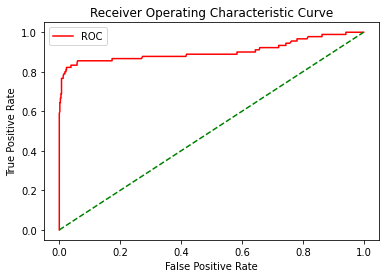

In [ ]:
plot_roc_curve(fpr, tpr)

In [ ]:
precision, recall, threshold = metrics.precision_recall_curve(y_test, Stacking.predict_proba(X_test)[:, 1])
f1 =  2 * (precision*recall / (precision + recall))

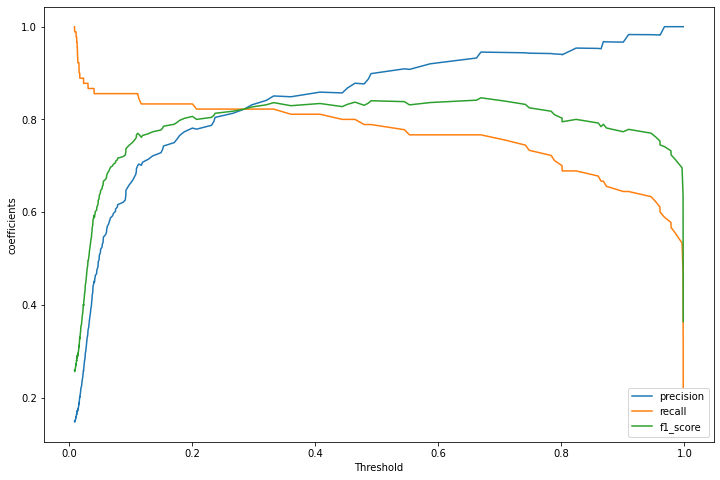

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(threshold, precision[:-1], label = 'precision')
plt.plot(threshold, recall[:-1], label = 'recall')
plt.plot(threshold, f1[:-1], label = 'f1_score')
plt.xlabel('Threshold')
plt.ylabel('coefficients')
plt.legend()

In [ ]:
def model_final(model, X, threshold) :
  return model.predict_proba(X)[:, 1] > threshold

In [ ]:
for i in np.arange(0.40, 0.5, 0.01):
  y_pred_final = model_final(Stacking, X_test, i)
  print('threshold = ', i)
  print(classification_report(y_test, y_pred_final))

threshold =  0.4
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       548
           1       0.86      0.81      0.83        90

    accuracy                           0.95       638
   macro avg       0.91      0.89      0.90       638
weighted avg       0.95      0.95      0.95       638

threshold =  0.41000000000000003
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       548
           1       0.86      0.80      0.83        90

    accuracy                           0.95       638
   macro avg       0.91      0.89      0.90       638
weighted avg       0.95      0.95      0.95       638

threshold =  0.42000000000000004
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       548
           1       0.86      0.80      0.83        90

    accuracy                           0.95       638
   macro avg       0.91      0.89      0.90  

#### Analyse du seuil de probabilité (Voting)

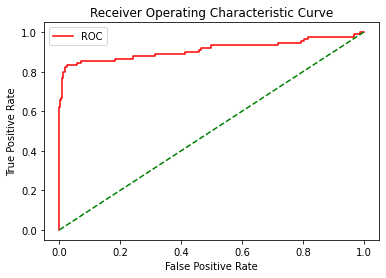

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,  Voting.predict_proba(X_test)[:, 1])
plot_roc_curve(fpr, tpr)

In [ ]:
precision, recall, threshold = metrics.precision_recall_curve(y_test, Voting.predict_proba(X_test)[:, 1])
f1 =  2 * (precision*recall / (precision + recall))

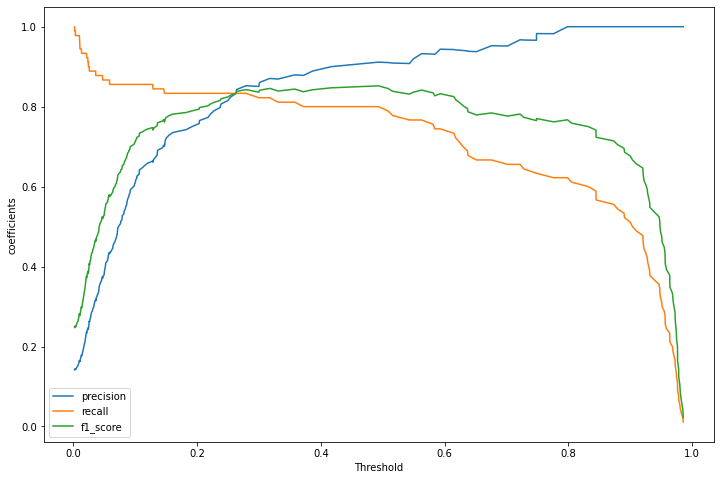

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(threshold, precision[:-1], label = 'precision')
plt.plot(threshold, recall[:-1], label = 'recall')
plt.plot(threshold, f1[:-1], label = 'f1_score')
plt.xlabel('Threshold')
plt.ylabel('coefficients')
plt.legend()

In [251]:
for i in np.arange(0.40, 0.5, 0.01):
  y_pred_final = model_final(Voting, X_test, i)
  print('threshold = ', i)
  print(classification_report(y_test, y_pred_final))

threshold =  0.4
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       548
           1       0.90      0.80      0.85        90

    accuracy                           0.96       638
   macro avg       0.93      0.89      0.91       638
weighted avg       0.96      0.96      0.96       638

threshold =  0.41000000000000003
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       548
           1       0.90      0.80      0.85        90

    accuracy                           0.96       638
   macro avg       0.93      0.89      0.91       638
weighted avg       0.96      0.96      0.96       638

threshold =  0.42000000000000004
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       548
           1       0.91      0.80      0.85        90

    accuracy                           0.96       638
   macro avg       0.94      0.89      0.91  

## 4.2 Résultats

- **Modèle Stacking :**
      recall = 0.78
      accuracy = 0.96
      precision = 0.91

    En changeant le seuil de probabilité grâce au paramètre threshold on obtient :
      recall = 0.80
      accuracy = 0.96
      precision = 0.88
      threshold = 0.46



- **Modèle Voting :** .
      recall = 0.79
      accuracy = 0.96
      precision = 0.91

    En changeant le seuil de probabilité grâce au paramètre threshold on obtient :
      recall = 0.80
      accuracy = 0.96
      precision = 0.91
      threshold = 0.42


**On choisit comme modèle final le VotingClassifier avec threshold = 0.42**

# 5. Utiliser le modèle sur un nouveau jeu de données et enregistrer les résultats

In [254]:
data_test = pd.read_csv('/content/gdrive/My Drive/test.csv')
y_submission_test = pd.read_csv('/content/gdrive/My Drive/sampleSubmission (1).csv')

In [255]:
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [256]:
y_submission_test.head()

,id,churn
0,1,yes
1,2,no
2,3,no
3,4,yes
4,5,yes


In [257]:
data_test = data_preprocessing(data_test)
  data_test.head()

,id,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,1,KS,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,2,AL,118,yes,no,0,223.4,98,220.6,101,203.9,118,6.3,6,0
2,3,IA,62,no,no,0,120.7,70,307.2,76,203.0,99,13.1,6,4
3,4,VT,93,no,no,0,190.7,114,218.2,111,129.6,121,8.1,3,3
4,5,NE,174,no,no,0,124.3,76,277.1,112,250.7,115,15.5,5,3


In [ ]:
id = y_submission_test['id']
del y_submission_test['id']
y = target_preprocessing.transform(data.churn)

In [ ]:
Voting.fit(data_train, np.array(y).reshape((y.shape[0], )))

VotingClassifier(estimators=[('grid_GradientBoost',
                              Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('standardscaler',
                                                                                StandardScaler(),
                                                                                <sklearn.compose._column_transformer.make_column_selector object at 0x7fb263e02cd0>),
                                                                               ('onehotencoder',
                                                                                OneHotEncoder(),
                                                                                <sklearn.compose._column_transformer.make_column_selector object at 0x7fb258379c50>...
                                                                               ('onehotencoder',
                                                            

In [ ]:
y_pred_submission_Voting  = model_final(Voting, data_test, 0.42)
#y_pred_submission_Voting  = Voting.predict(data_test) 0.36

In [ ]:
submission_Voting) = pd.DataFrame()
submission_Voting)["id"] = id
submission_Voting["churn"] = target_preprocessing.inverse_transform(y_pred_submission_Voting)

In [ ]:
submission_Voting.head()

,id,churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no


In [ ]:
submission_Voting.to_csv("submission_Voting.csv", index=False)